# A/B testing

```python
# Simulate beta posterior
def simulate_beta_posterior(trials, beta_prior_a, beta_prior_b):
    num_successes = np.sum(trials)
    posterior_draws = np.random.beta(
    num_successes + beta_prior_a,
    len(trials) - num_successes + beta_prior_b,
    10000
)
return posterior_draws

# Simulate posterior draws for each layout:
A_posterior = simulate_beta_posterior(A_clicks, 1, 1)
B_posterior = simulate_beta_posterior(B_clicks, 1, 1)

# Plot posteriors:
sns.kdeplot(A_posterior, shade=True, label="A")
s.kdeplot(B_posterior, shade=True, label="B")
plt.show()

# Posterior di erence between B and A:
diff = B_posterior - A_posterior
sns.kdeplot(diff, shade=True, label="difference: A-B")
plt.show()

# Probability of B being better:
(diff > 0).mean()

# Expected loss
# If we deploy the worse website version, how many clicks do we lose?
# Difference (B-A) when A is better
loss = diff[diff < 0]
# Expected (average) loss
expected_loss = loss.mean()
print(expected_loss)
```

## Simulate beta posterior
> 
> In the upcoming few exercises, you will be using the `simulate_beta_posterior()` function you saw defined in the last video. In this exercise, you will get a feel for what the function is doing by carrying out the computations it performs.
> 
> You are given a list of ten coin tosses, called `tosses`, in which `1` stands for heads, `0` for tails, and we define heads as a "success". To simulate the posterior probability of tossing heads, you will use a beta prior. Recall that if the prior isn $$Beta(a,b)$$
> 
> , then the posterior is $$Beta(x, y)$$, with:
> 
> $$x = NumberOfSuccesses + a$$,
> 
> $$y=NumberOfObservations-NumberOfSuccess+b$$.


### init

In [2]:
###################
##### liste de mots (list)
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(tosses)
"""

tobedownloaded="""
{list: {'tosses.txt': 'https://file.io/OrybFE7yOugw'}}
"""
prefixToc='1.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc)

#initialisation

import pandas as pd
from downloadfromFileIO import loadListFromTxt
tosses = loadListFromTxt(prefix+'tosses.txt')


Téléchargements à lancer
{'list': {'tosses.txt': 'https://file.io/OrybFE7yOugw'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    30    0    30    0     0     44      0 --:--:-- --:--:-- --:--:--    44



In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### code

[Simulate beta posterior | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=2)

> -   Set both prior parameters, `beta_prior_a` and `beta_prior_b`, to `1`.
> -   Calculate the number of heads and assign it to `num_successes`.
> -   Generate posterior draws according to the formula above and assign the result to `posterior_draws`.

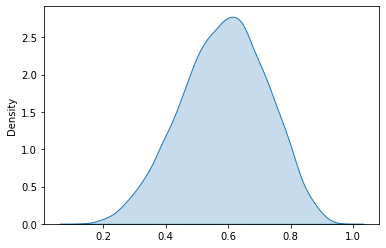

In [6]:
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 1
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  beta_prior_a + num_successes, 
  len(tosses) - num_successes + beta_prior_b, 
  10000)  

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, shade=True)
plt.show()

[Simulate beta posterior | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=2)

> -   Set the prior parameters, `beta_prior_a` and `beta_prior_b`, to `1` and `10`, respectively.
> -   Calculate the number of heads and assign it to `num_successes`.
> -   Generate posterior draws according to the formula above and assign the result to `posterior_draws`.

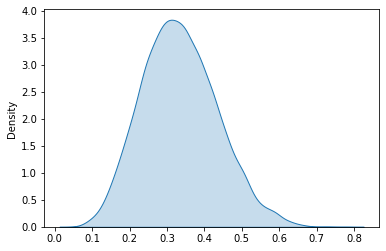

In [7]:
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 10
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  beta_prior_a + num_successes, 
  len(tosses) - num_successes + beta_prior_b, 
  10000)  

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, shade=True)
plt.show()

## Posterior click rates
> 
> After a successful career episode at the Department for Health, you switch to marketing. Your new company has just run two pilot advertising campaigns: one for sneakers, and one for clothes. Your job is to find out which one was more effective as measured by the click-through rate and should be rolled out to a larger audience.
> 
> You decide to run A/B testing, modeling the data using the binomial likelihood. You found out that a typical click-through rate for the previous ads has been around 15% recently, with results varying between 5% and 30%. Based on this, you conclude that $$Beta(10, 50)$$
> 
> would be a good prior for the click-through rate.
> 
> The `ads` data, the `simulate_beta_posterior()` function you saw in the video, and `numpy` (as `np`) are available in your workspace.

### init

In [8]:
###################
##### inspect Function
###################

""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
import inspect
print_func(simulate_beta_posterior)
"""

def simulate_beta_posterior(trials, beta_prior_a, beta_prior_b):
    num_successes = np.sum(trials)
    return np.random.beta(num_successes + beta_prior_a, 
                          len(trials) - num_successes + beta_prior_b, 
                          10000)


In [9]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(ads)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'ads.csv': 'https://file.io/4ErbQS77moqw'}}
"""
prefixToc='1.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc)

#initialisation

import pandas as pd
ads = pd.read_csv(prefix+'ads.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'ads.csv': 'https://file.io/4ErbQS77moqw'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  738k    0  738k    0     0   558k      0 --:--:--  0:00:01 --:--:--  558k



### code

[Posterior click rates | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=3)

> -   Simulate 100000 draws from the prior distribution, assigning the result to `prior_draws`.
> -   Plot the density of `prior_draws` to make sure it reflects your prior knowledge about the click-through rate.

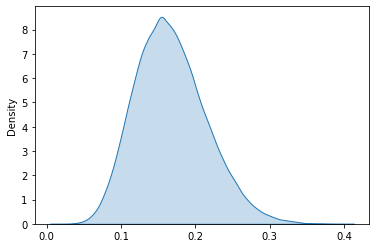

In [10]:
# Generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
sns.kdeplot(prior_draws, shade=True, label="prior")
plt.show()

[Posterior click rates | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=3)

> -   Take the `banner_clicked` column from `ads` for the rows where `product` is `clothes`, and assign the results to `clothes_clicked`.
> -   Take the `banner_clicked` column from `ads` for the rows where `product` is `sneakers`, and assign the results to `sneakers_clicked`.

In [12]:
# Extract the banner_clicked column for each product
clothes_clicked = ads.loc[ads['product'] == 'clothes']['banner_clicked']
sneakers_clicked = ads.loc[ads['product'] == 'sneakers']['banner_clicked']

[Posterior click rates | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=3)

> Generate draws from the two posteriors (one for clothes, one for sneakers) using the `simulate_beta_posterior()` function and assign them to `clothes_posterior` and `sneakers_posterior`, respectively.

In [13]:
# Simulate posterior draws for each product
clothes_posterior = simulate_beta_posterior(clothes_clicked, 10, 50)
sneakers_posterior = simulate_beta_posterior(sneakers_clicked, 10, 50)

[Posterior click rates | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=3)

> #### Question
> 
> You can run the following code snippet to plot the two posteriors.
> 
>     sns.kdeplot(clothes_posterior, shade=True, label="clothes")
>     sns.kdeplot(sneakers_posterior, shade=True, label="sneakers")
>     plt.show()
>     
> 
> Based on the plot, which of the statements is **false** about the clothes and sneakers advertising campaigns?

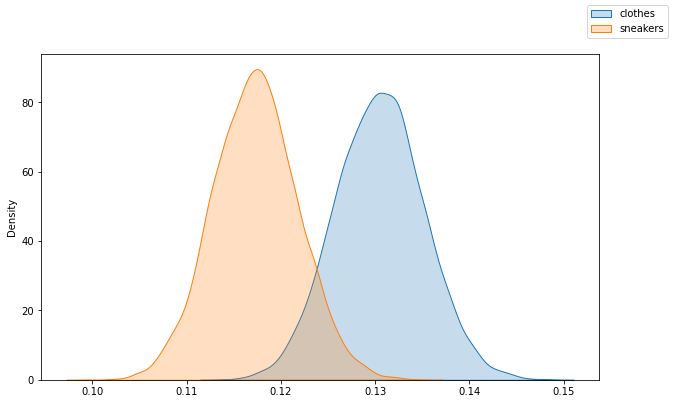

In [16]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(clothes_posterior, shade=True, label="clothes")
sns.kdeplot(sneakers_posterior, shade=True, label="sneakers")
fig.legend()
plt.show()

## A or B, and how sure are we?
> 
> You have just discovered that clothes ads are likely to have a higher click ratio than sneakers ads. But what is the exact probability that this is the case? To find out, you will have to calculate the posterior difference between clothes and sneakers click rates. Then, you will calculate a credible interval for the difference to measure the uncertainty in the estimate. Finally, you will calculate the percentage of cases where this difference is positive, which corresponds to clothes click rate being higher. Let's get on with it!
> 
> `pymc3`, `seaborn`, and `matplotlib.pyplot` have been imported for you as `pm`, `sns`, and `plt`, respectively. Also, `clothes_posterior` and `sneakers_posterior` which you have calculated in the previous exercise are available in your workspace.

[A or B, and how sure are we? | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=4)

> Calculate the posterior difference in click rates between clothes and sneakers ads and assign it to `diff`.

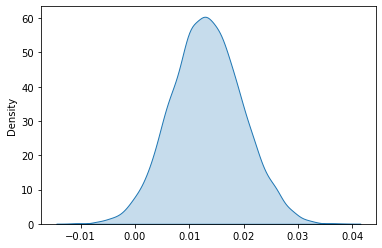

In [17]:
# Calculate posterior difference and plot it
diff = clothes_posterior-sneakers_posterior
sns.kdeplot(diff, shade=True, label="diff")
plt.show()

[A or B, and how sure are we? | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=4)

> Calculate the 90% HPD credible interval of the posterior difference, assign it to `interval`, and print it.

In [19]:
import pymc3 as pm

In [20]:
# Calculate and print 90% credible interval of posterior difference
interval = pm.hpd(diff, hdi_prob=0.9)
print(interval)

[0.00260289 0.02410422]


/home/explore/miniconda3/envs/datacamp/lib/python3.7/site-packages/arviz/stats/stats.py:341: UserWarning: hpd will be deprecated Please replace hdi
  ("hpd will be deprecated " "Please replace hdi"),


[A or B, and how sure are we? | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=4)

> Calculate the probability that the posterior difference is positive and assign it to `clothes_better_prob`.

In [21]:
# Calculate and print probability of clothes ad being better
clothes_better_prob = (diff > 0).mean()
print(clothes_better_prob)

0.9791


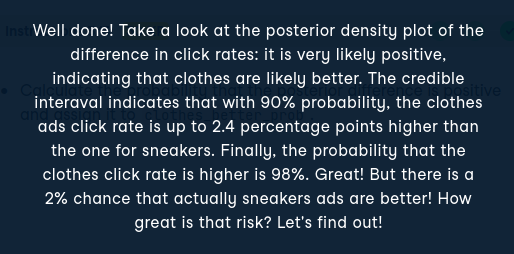

## How bad can it be?
> 
> You have concluded that with 98% probability, clothes ads have a higher click-through ratio than sneakers ads. This suggests rolling out the clothes campaign to a larger audience. However, there is a 2% risk that it's the sneakers ads that are actually better. If that's the case, how many clicks do we lose if we roll out the clothes campaign?
> 
> The answer to this is the expected loss: the average posterior difference between the two click-through ratios given that sneakers ads do better. To calculate it, you only need to take the entries in the posterior difference where the sneakers click-through rate is higher and compute their average.
> 
> The posterior difference between the click rates, `diff`, is available in your workspace. Let's find out how much is at risk!

[How bad can it be? | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=5)

> -   Slice `diff` to take only cases where it is negative (corresponding to sneakers click rate being higher) and assign the result to `loss`.
> -   Calculate the average `loss`, assign it to `expected_loss` and print it.

In [22]:
# Slice diff to take only cases where it is negative
loss = diff[diff < 0]

# Compute and print expected loss
expected_loss = loss.mean()
print(expected_loss)

-0.0024090066800903733


# Decision analysis

```python
# Forest plot
import pymc3 as pm
# Collect posterior draws in a dictionary
revenue = {"A": rev_A, "B": rev_B}
# Draw the forest plot
pm.forestplot(revenue)
```

## Decision analysis: cost
> 
> Your journey in marketing continues. You have already calculated the posterior click rates for clothes and sneakers ads, available in your workspace as `clothes_posterior` and `sneakers_posteriors`, respectively. Your boss, however, is not interested in the distributions of click rates. They would like to know what would be the cost of rolling out an ad campaign to 10'000 users. The company's advertising partner charges `$2.5` per click on a mobile device and `$2` on a desktop device. Your boss is interested in the cost of the campaign for each product (clothes and sneakers) on each platform (mobile and desktop): four quantities in total.
> 
> Let's compare these four posterior costs using the forest plot from `pymc3`, which has been imported for you as `pm`.

### init

In [23]:
###################
##### numpy ndarray float
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(clothes_posterior, sneakers_posterior)
"""

tobedownloaded="""
{numpy.ndarray: {'clothes_posterior.csv': 'https://file.io/snQiy2ttc7vM',
  'sneakers_posterior.csv': 'https://file.io/EFvlffLJ3QWq'}}
"""
prefixToc='2.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc)

#initialisation

from downloadfromFileIO import loadNDArrayFromCsv
clothes_posterior = loadNDArrayFromCsv(prefix+'clothes_posterior.csv')
sneakers_posterior = loadNDArrayFromCsv(prefix+'sneakers_posterior.csv')


Téléchargements à lancer
{'numpy.ndarray': {'clothes_posterior.csv': 'https://file.io/snQiy2ttc7vM', 'sneakers_posterior.csv': 'https://file.io/EFvlffLJ3QWq'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  192k    0  192k    0     0   225k      0 --:--:-- --:--:-- --:--:--  225k

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  193k    0  193k    0     0   209k      0 --:--:-- --:--:-- --:--:--  209k



### code

In [24]:
import pymc3 as pm

[Decision analysis: cost | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=7)

> Calculate the distributions of the numbers of clicks for clothes and sneakers and assign the results to `clothes_num_clicks` and `sneakers_num_clicks`, respectively.

In [25]:
# Calculate distributions of the numbers of clicks for clothes and sneakers
clothes_num_clicks = clothes_posterior * 10000
sneakers_num_clicks = sneakers_posterior * 10000

[Decision analysis: cost | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=7)

> Create a dictionary `ads_costs` with four keys: `clothes_mobile`, `sneakers_mobile`, `clothes_desktop`, and `sneakers_sneakers`, each holding the cost distribution of corresponding clicks.

In [27]:
# Calculate cost distributions for each product and platform
ads_costs = {
    "clothes_mobile": clothes_num_clicks * 2.5,
    "sneakers_mobile": sneakers_num_clicks * 2.5,
    "clothes_desktop": clothes_num_clicks * 2,
    "sneakers_desktop": sneakers_num_clicks * 2,
}

[Decision analysis: cost | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=7)

> Draw a `forestplot()` of `ads_costs` using a 99% credible interval (the `textsize` argument has been added to aid plot visibility).

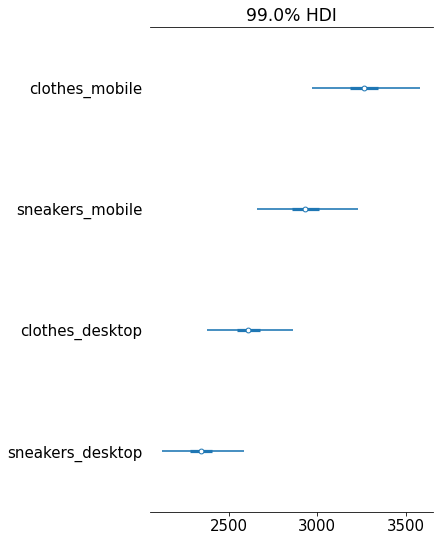

In [28]:
# Draw a forest plot of ads_costs
pm.forestplot(ads_costs, hdi_prob=0.99, textsize=15)
plt.show()

## Decision analysis: profit
> 
> Good job translating the posterior click rates into cost distributions! In the meantime, a new company policy has been released. From now on, the goal of the marketing department is not to minimize the costs of campaigns, which was quite ineffective, but rather to maximize the profit. Can you adjust your findings accordingly, knowing that the expected revenue per click from a mobile ad is `$3.4`, and the one from a desktop ad is `$3`? To calculate the profit, you need to calculate the revenue from all clicks, then subtract the corresponding cost from it.
> 
> Everything you have calculated in the previous exercise is available in your workspace: the `ads_cost` dictionary as well as the number of click distributions: `clothes_num_clicks` and `sneakers_num_clicks`.

[Decision analysis: profit | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=8)

> -   Create a dictionary `ads_profit` with four keys: `clothes_mobile`, `sneakers_mobile`, `clothes_desktop`, and `sneakers_sneakers`, each holding the profit distribution from corresponding clicks.
> -   Draw a forest plot of `ads_proft` using the credible interval of 99%.

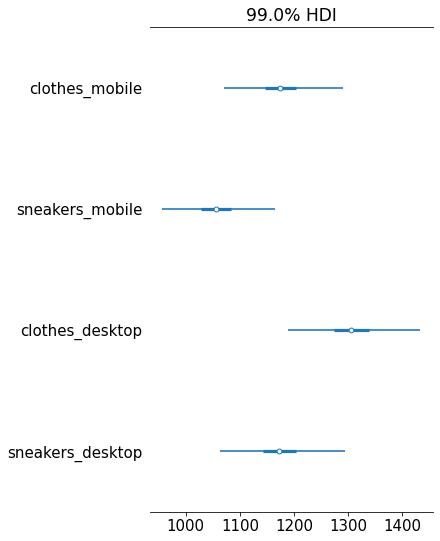

In [30]:
# Calculate profit distributions for each product and platform
ads_profit = {
    "clothes_mobile": clothes_num_clicks * 3.4- clothes_num_clicks * 2.5,
    "sneakers_mobile": sneakers_num_clicks * (3.4-2.5),
    "clothes_desktop": clothes_num_clicks*(3-2),
    "sneakers_desktop": sneakers_num_clicks*(3-2),
}

# Draw a forest plot of ads_profit
pm.forestplot(ads_profit, hdi_prob=0.99, textsize=15)
plt.show()

# Regression and forecasting

```python

# Normal distribution
normal_0_1 = np.random.normal(0, 1, size=10000)
sns.kdeplot(normal_0_1, shade=True, label="N(0,1)")
plt.show()

# Plot posterior
import pymc3 as pm
pm.plot_posterior(marketing_spending_draws, hdi_prob=0.95)
``` 

## Analyzing regression parameters
> 
> Your linear regression model has four parameters: the intercept, the impact of clothes ads, the impact of sneakers ads, and the variance. The draws from their respective posterior distributions have been sampled for you and are available as `intercept_draws`, `clothes_draws`, `sneakers_draws`, and `sd_draws`, respectively.
> 
> Before you make predictions with your model, it's a good practice to analyze the posterior draws visually. In this exercise, you will first take a look at the descriptive statistics for each parameter's draws, and then you will visualize the posterior distribution for one of them as an example. `pymc3` and `pandas` have been imported for you as `pm` and `pd`, respectively. Let's take a look at the parameters draws!

### init

In [31]:
import pymc3 as pm
import pandas as pd

In [32]:
###################
##### numpy ndarray float
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(intercept_draws, clothes_draws, sneakers_draws,  sd_draws)
"""

tobedownloaded="""
{numpy.ndarray: {'clothes_draws.csv': 'https://file.io/FkcdbLKv5L04',
  'intercept_draws.csv': 'https://file.io/U1JXD6u9tjVJ',
  'sd_draws.csv': 'https://file.io/RTgSpWRZJcPE',
  'sneakers_draws.csv': 'https://file.io/FMPb94JQ9aSx'}}
"""
prefixToc='3.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc)

#initialisation

from downloadfromFileIO import loadNDArrayFromCsv
clothes_draws = loadNDArrayFromCsv(prefix+'clothes_draws.csv')
intercept_draws = loadNDArrayFromCsv(prefix+'intercept_draws.csv')
sd_draws = loadNDArrayFromCsv(prefix+'sd_draws.csv')
sneakers_draws = loadNDArrayFromCsv(prefix+'sneakers_draws.csv')


Téléchargements à lancer
{'numpy.ndarray': {'clothes_draws.csv': 'https://file.io/FkcdbLKv5L04', 'intercept_draws.csv': 'https://file.io/U1JXD6u9tjVJ', 'sd_draws.csv': 'https://file.io/RTgSpWRZJcPE', 'sneakers_draws.csv': 'https://file.io/FMPb94JQ9aSx'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 39685    0 39685    0     0  64215      0 --:--:-- --:--:-- --:--:-- 64215

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37853    0 37853    0     0  55666      0 --:--:-- --:--:-- --:--:-- 55666

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37025    0 37025    0     0  54528      0 --:--:-- --:--:-- --:--:-- 54448

  % Total    % Received % Xferd

### code

[Analyzing regression parameters | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=11)

> Create a DataFrame `posterior_draws_df` with four columns, each containing one parameter's posterior draws.

In [33]:
# Collect parameter draws in a DataFrame
posterior_draws_df = pd.DataFrame({
    "intercept_draws": intercept_draws,
    "clothes_draws": clothes_draws,
  	"sneakers_draws": sneakers_draws,
    "sd_draws": sd_draws,
})

[Analyzing regression parameters | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=11)

> Calculate the descriptive statistics of all parameters draws using the `.describe()` method, assign them to `draws_stats`, and print them.

In [35]:
# Describe parameter posteriors
draws_stats = posterior_draws_df.describe()
print(draws_stats)

       intercept_draws  clothes_draws  sneakers_draws     sd_draws
count      2000.000000    2000.000000     2000.000000  2000.000000
mean          1.280420       0.104594        0.103594     2.651661
std           0.903845       0.030282        0.031596     0.159491
min          -2.088446      -0.007500        0.001084     2.211899
25%           0.712354       0.085381        0.081577     2.543340
50%           1.288362       0.104680        0.103554     2.639033
75%           1.849244       0.123830        0.125466     2.754714
max           4.343638       0.229886        0.211751     3.278124


[Analyzing regression parameters | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=11)

> Plot the posterior density of the clothes impact parameter using the appropriate function from `pymc3`, setting the credible interval to 99%.

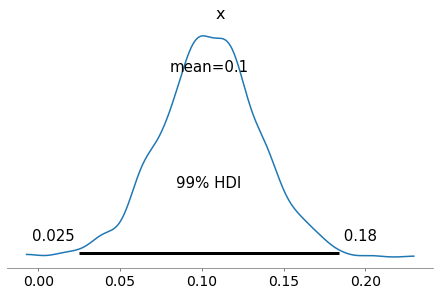

In [38]:
# Plot clothes parameter posterior
pm.plot_posterior(clothes_draws, hdi_prob=0.99)
plt.show()

## Predictive distribution
> 
> Good job analyzing the parameter draws! Let's now use the linear regression model to make predictions. How many clicks can we expect if we decide to show 10 clothes ads and 10 sneaker ads? To find out, you will have to draw from the predictive distribution: a normal distribution with the mean defined by the linear regression formula and standard deviation estimated by the model.
> 
> First, you will summarize each parameter's posterior with its mean. Then, you will calculate the mean of the predictive distribution according to the regression equation. Next, you will draw a sample from the predictive distribution and finally, you will plot its density. Here is the regression formula for your convenience:
> 
> ![The number of clicks has a normal distribution with the mean β0 + β1 * clothes-ads-shown + β2 * sneakers-ads-shown, and some standard deviation sigma.](https://assets.datacamp.com/production/repositories/5803/datasets/822c541b9003d7bff3049211cdf792bc812ae11a/Screenshot%202021-01-20%20at%2023.16.21.png)
> 
> `pymc3`, `numpy`, and `seaborn` have been imported under their usual aliases.

[Predictive distribution | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=12)

> Summarize each of the drawn parameters (`intercept_draws`, `sneakers_draws`, `clothes_draws`, and `sd_draws`) by its posterior mean.

In [39]:
# Aggregate posteriors of the parameters to point estimates
intercept_coef = intercept_draws.mean()
sneakers_coef = sneakers_draws.mean()
clothes_coef = clothes_draws.mean()
sd_coef = sd_draws.mean()

[Predictive distribution | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=12)

> Calculate the mean of the predictive distribution based on the linear model, assuming you will show 10 sneaker and 10 clothes ads, and assign it to `pred_mean`.

In [40]:
# Calculate the mean of the predictive distribution
pred_mean = intercept_coef+10*sneakers_coef+10*clothes_coef

[Predictive distribution | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=12)

> Sample 1000 draws from the predictive distribution, that is a normal distribution with mean `pred_mean` and standard deviation `sd_coef`, and assign them to `pred_draws`.

In [41]:
# Sample 1000 draws from the predictive distribution
pred_draws = np.random.normal(pred_mean, sd_coef, size=1000)

[Predictive distribution | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-inference?ex=12)

> Plot the density of the predictive distribution using the appropriate `pymc3` function and setting the credible interval to 99%.

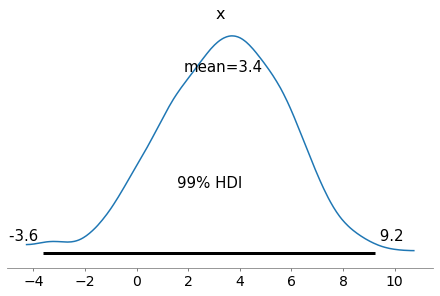

In [42]:
# Plot the density of the predictive distribution
pm.plot_posterior(pred_draws, hdi_prob=0.99)
plt.show()